In [1]:
import pandas as pd
df=pd.read_csv("CrimesOnWomenData.csv")
df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [2]:
df = df.iloc[:, 1:]


In [3]:
df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [5]:
df.isnull().sum()

,0
State,0
Year,0
Rape,0
K&A,0
DD,0
AoW,0
AoM,0
DV,0
WT,0


In [7]:
df.duplicated().sum()

np.int64(0)

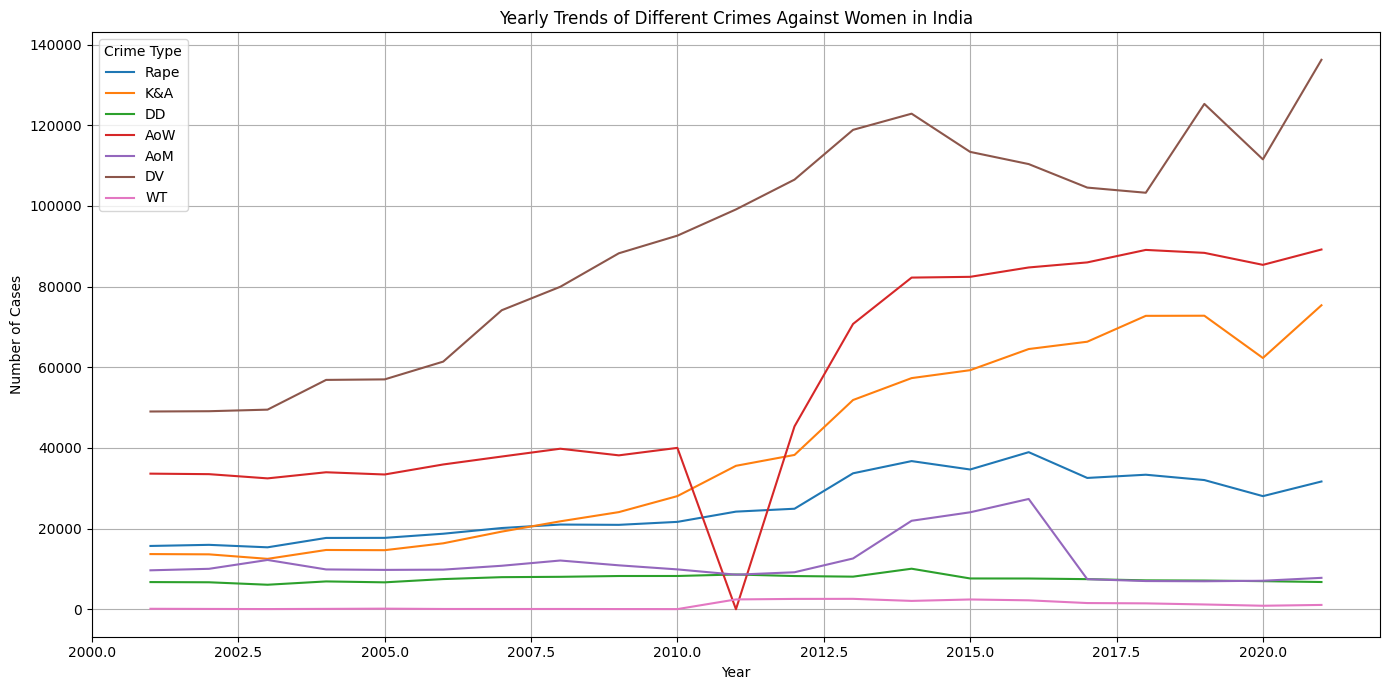

In [9]:
#yearly trend of different types of crimes against women
import matplotlib.pyplot as plt
import seaborn as sns
# Group by year and sum up all crime categories
yearly_totals = df.groupby('Year').sum(numeric_only=True).reset_index()
crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
# Plot each crime type over the years
plt.figure(figsize=(14, 7))
for crime in crime_columns:
    sns.lineplot(data=yearly_totals, x='Year', y=crime, label=crime)
#Visualization
plt.title('Yearly Trends of Different Crimes Against Women in India')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Crime Type')
plt.grid(True)
plt.tight_layout()
plt.show()

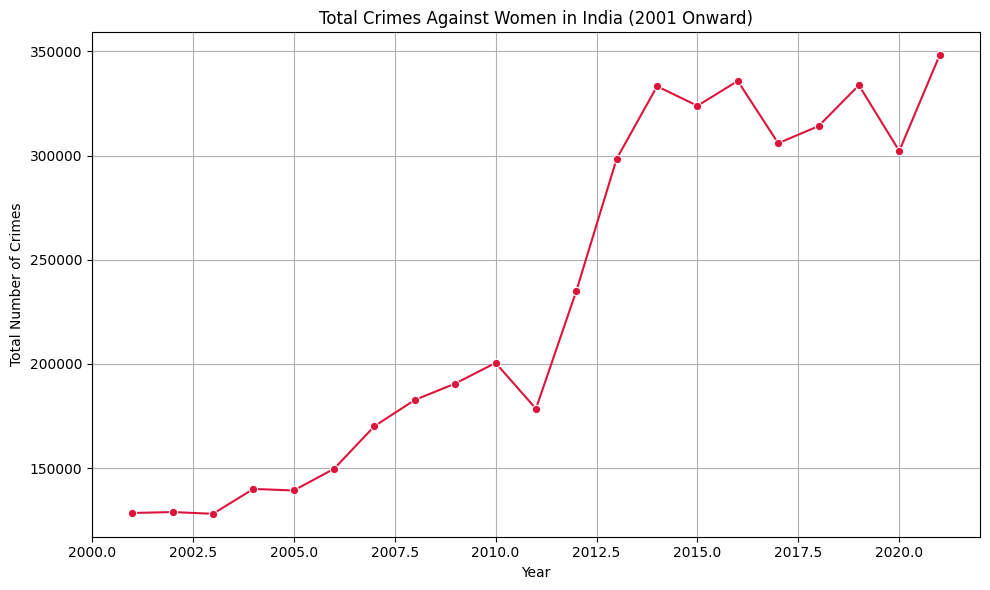

In [10]:
# trend of total crimes against women in India from 2001 to 2021
crime_types = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
df['Total_Crimes'] = df[crime_types].sum(axis=1)
yearly_crime = df.groupby('Year')['Total_Crimes'].sum().reset_index()
# plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_crime, x='Year', y='Total_Crimes', marker='o', color='crimson')
plt.title('Total Crimes Against Women in India (2001 Onward)')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-13-17250338.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states.head(10), x='Total_Crimes', y='State', palette='Reds_r')


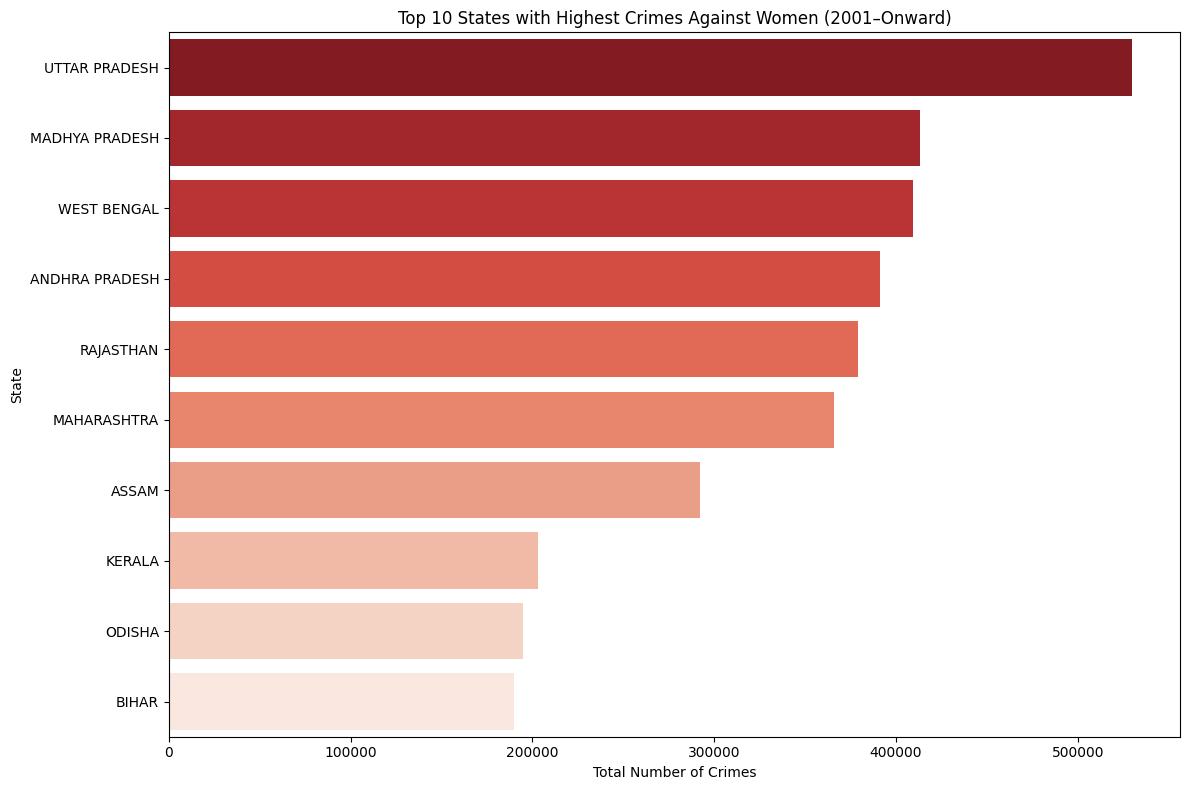

In [13]:
# top 10 states in India with heighest crime rate against women
df['State'] = df['State'].str.upper()
state_crimes = df.groupby('State')['Total_Crimes'].sum().reset_index()
# Sort by total crimes descending
top_states = state_crimes.sort_values(by='Total_Crimes', ascending=False)
# Plot Top 10 states
plt.figure(figsize=(12, 8))
sns.barplot(data=top_states.head(10), x='Total_Crimes', y='State', palette='Reds_r')
plt.title('Top 10 States with Highest Crimes Against Women (2001–Onward)')
plt.xlabel('Total Number of Crimes')
plt.ylabel('State')
plt.tight_layout()
plt.show()


/tmp/ipython-input-14-2826919833.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dowry_states.head(10), x='DD', y='State', palette='Blues_r')


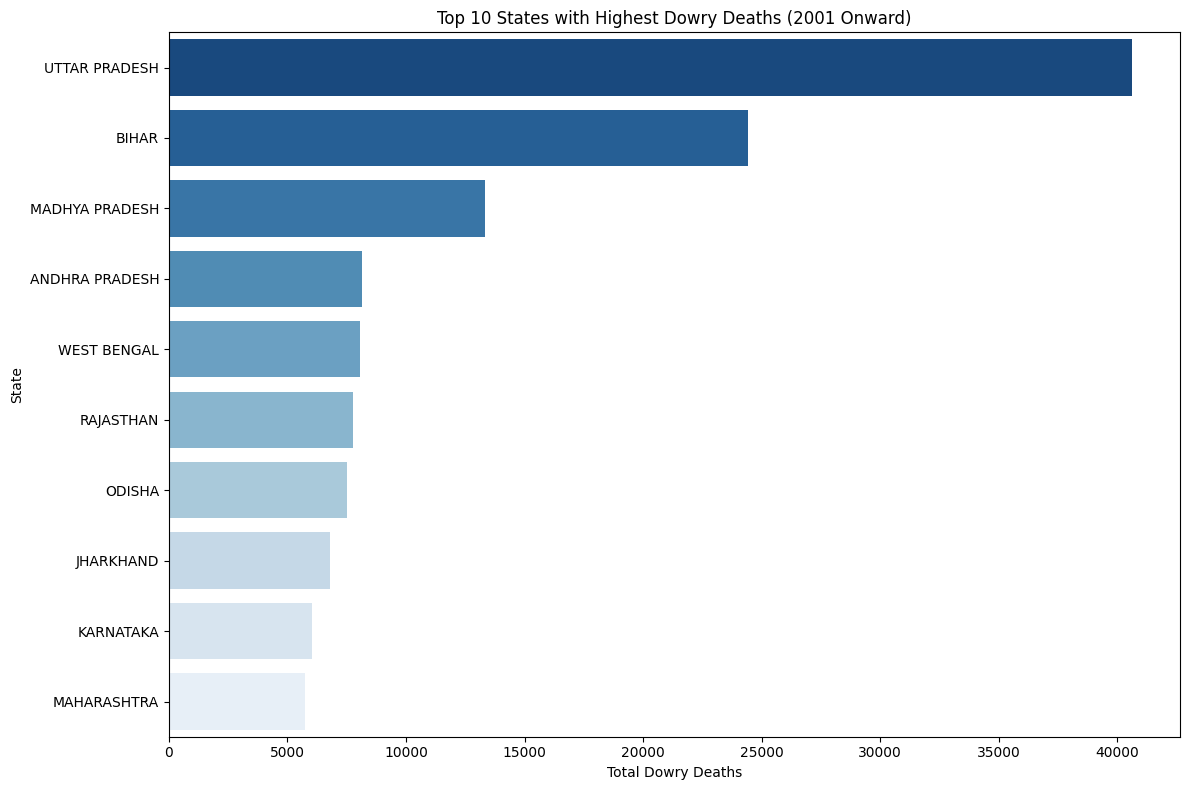

In [14]:
# Top States by Dowry Deaths

# Group by State and sum dowry deaths
dowry_deaths_by_state = df.groupby('State')['DD'].sum().reset_index()

# Sort in descending order
top_dowry_states = dowry_deaths_by_state.sort_values(by='DD', ascending=False)

# Plot top 10 states
plt.figure(figsize=(12, 8))
sns.barplot(data=top_dowry_states.head(10), x='DD', y='State', palette='Blues_r')
plt.title('Top 10 States with Highest Dowry Deaths (2001 Onward)')
plt.xlabel('Total Dowry Deaths')
plt.ylabel('State')
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-2664082301.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_DV_states.head(10), x='DV', y='State', palette='Blues_r')


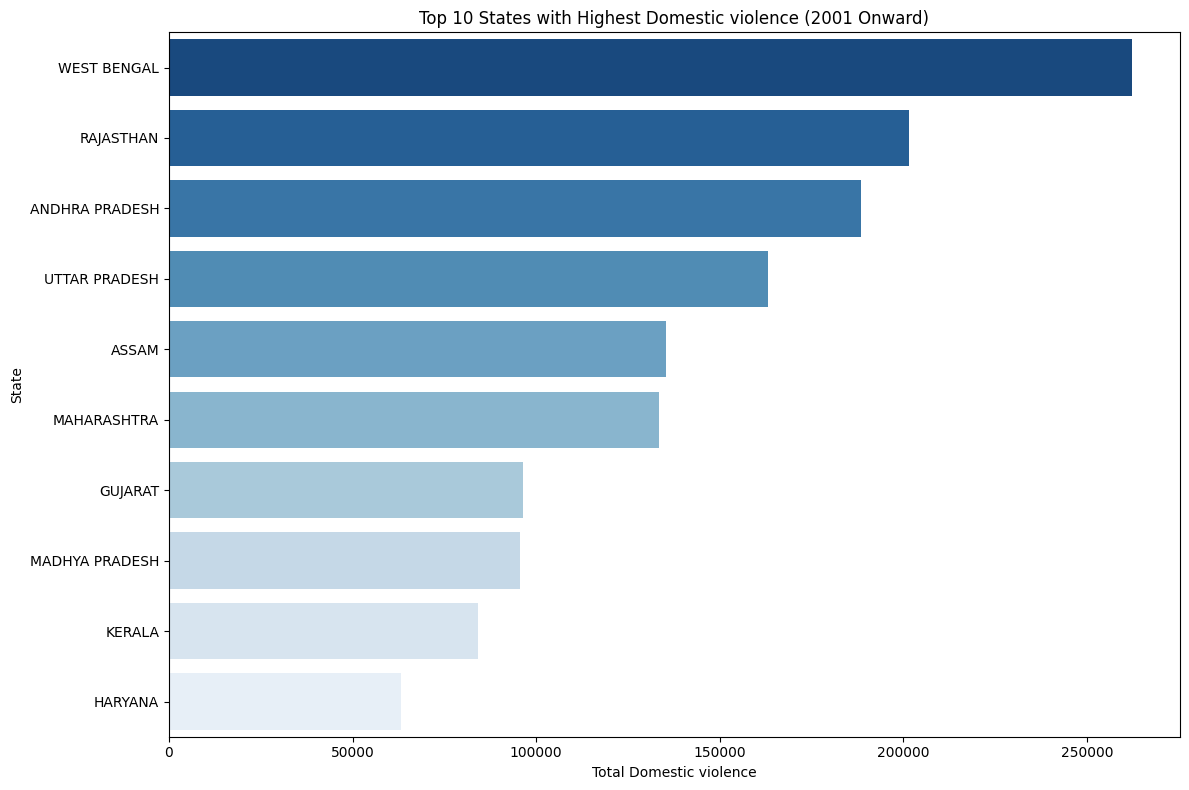

In [19]:
# Top States by Domestic violence

# Group by State and sum dowry deaths
domestic_violence = df.groupby('State')['DV'].sum().reset_index()

# Sort in descending order
top_DV_states = domestic_violence.sort_values(by='DV', ascending=False)

# Plot top 10 states
plt.figure(figsize=(12, 8))
sns.barplot(data=top_DV_states.head(10), x='DV', y='State', palette='Blues_r')
plt.title('Top 10 States with Highest Domestic violence (2001 Onward)')
plt.xlabel('Total Domestic violence')
plt.ylabel('State')
plt.tight_layout()
plt.show()